In [1]:
import sys
import os
import matplotlib.pyplot as plt

# Add the src directory to the path. TEMPORARY FIX
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))

from src.data_processing.data_loader import CoastData

## Load the data

In [2]:
data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/raw/SCLabels_v1.0.0/"))

# Test with a single station. Differents stations: agrelo, cies, cadiz, samarador, arenaldentem
data = CoastData(data_path, name="agrelo")

# Load the data, all the different stations
data = CoastData(data_path)

CoastData: agrelo - 244 images
CoastData: global - 1717 images


In [3]:
# Get the names of the different stations
station_names = data.get_station_names()
print(station_names)

['agrelo', 'arenaldentem', 'cadiz', 'cies', 'samarador']


### Get the data from CoastData

In [4]:
image_metadata = data[0]
print(image_metadata['image']['filename'])

1548260289.Wed.Jan.23_17_18_09.CET.2019.agrelo.image.jpg


In [5]:
# We can get the data by station name or in a global way (only the images and the masks)
filtered_data = data.get_images_and_masks() # All the data
print(filtered_data[0])

# We can also get the data by station name
filtered_data = data.get_images_and_masks("cadiz")
print(filtered_data[0])

{'image': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/raw/SCLabels_v1.0.0/images/1548260289.Wed.Jan.23_17_18_09.CET.2019.agrelo.image.jpg', 'mask': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/raw/SCLabels_v1.0.0/masks/1548260289.Wed.Jan.23_17_18_09.CET.2019.agrelo.mask.png'}
{'image': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/raw/SCLabels_v1.0.0/images/1602845999.Fri.Oct.16_11_59_59.CET.2020.cadiz.image.jpg', 'mask': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/raw/SCLabels_v1.0.0/masks/1602845999.Fri.Oct.16_11_59_59.CET.2020.cadiz.mask.png'}


#### Plot the images and the masks

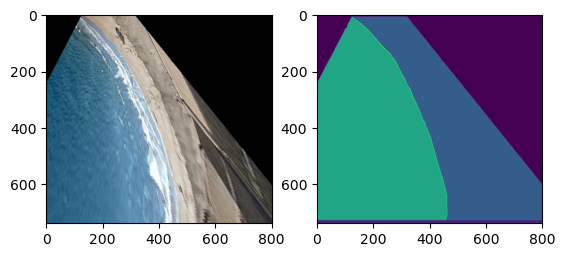

In [6]:
fig, ax = plt.subplots(1, 2)
img_path = filtered_data[0]['image']
mask_path = filtered_data[0]['mask']

ax[0].imshow(plt.imread(img_path))
ax[1].imshow(plt.imread(mask_path))

plt.show()

## Split data

In [7]:
data_splits = data.split_data(val_size = 0.2, test_size = 0.1)

print("\nTrain size: ", len(data_splits["train"]['X']))
print("Validation size: ", len(data_splits["validation"]['X']))
print("Test size: ", len(data_splits["test"]['X']))

Coast: agrelo, Total size: 244
Coast: arenaldentem, Total size: 40
Coast: cadiz, Total size: 946
Coast: cies, Total size: 430
Coast: samarador, Total size: 57

Train size:  1200
Validation size:  343
Test size:  174
